# Est ce que les statistiques de bases des champions de League of Legends représentent le rôle principal de celui ci

# Consignes :

### Votre analyse sous forme de Jupyter Notebook déposé sur votre git en PUBLIC devra contenir:
### * Une problématique pertinente (c-a-d ou il est possible de répondre avec des données)
### * Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
### * Au moins 2 diagrammes avec des données discrètes
### * Au moins 3 graphiques avec des données catégoriques
### * 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
### * 1 heat map avec matrice de corrélation (si pertinent)
### * Des commentaires clairs et pertinents pour chaque graphiques

## Importation

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LOL.csv')

## Inspection des données

In [3]:
df

ID Champion_Name Primary_Role Primary_Location  Health  Mana  \
0      0        Aatrox      Fighter              Top     650     0   
1      1          Ahri         Mage              Mid     570   418   
2      2         Akali     Assassin              Mid     570   200   
3      3        Akshan     Marksman              Mid     630   350   
4      4       Alistar         Tank          Support     670   350   
..   ...           ...          ...              ...     ...   ...   
156  158          Zeri     Marksman           bottom     600   250   
157  159         Ziggs         Mage              Mid     606   480   
158  160        Zilean      Support          Support     574   452   
159  161           Zoe         Mage              Mid     630   425   
160  162          Zyra         Mage          Support     574   418   

     Health_Regen  Mana_Regen  Attack_Demage  Armor  Magic_Resistance  \
0             3.0           0             60     38                32   
1             2.0           8             53     18                30   
2             9.0           0             62     23                37   
3             4.0           7             52     26                30   
4             8.0           8             62     44                32   
..            ...         ...            ...    ...               ...   
156           3.0           8             50     20                30   
157           6.0           8             54     22                30   
158           5.0           8             52     24                30   
159           6.0           6             58     21                30   
160           5.0           4             53     29                30   

     Attack_Speed  Movement_Speed  Range  
0              65             345    175  
1              66             330    550  
2              62             345    125  
3              63             330    500  
4              62             330    125  
..            ...             ...    ...  
156            66             325    500  
157            62             325    550  
158            62             335    550  
159            62             340    550  
160            62             340    575  

[161 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                161 non-null    int64  
 1   Champion_Name     161 non-null    object 
 2   Primary_Role      161 non-null    object 
 3   Primary_Location  161 non-null    object 
 4   Health            161 non-null    int64  
 5   Mana              161 non-null    int64  
 6   Health_Regen      160 non-null    float64
 7   Mana_Regen        161 non-null    int64  
 8   Attack_Demage     161 non-null    int64  
 9   Armor             161 non-null    int64  
 10  Magic_Resistance  161 non-null    int64  
 11  Attack_Speed      161 non-null    int64  
 12  Movement_Speed    161 non-null    int64  
 13  Range             161 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 17.7+ KB


En affichant les données, je vois qu'il y a un problème dans la Primary_location. Je remplace donc les données pour que mes graphiques ne soient pas faussés. Une valeur de la colonne était écrite sans majuscule, ce qui pourrait fausser les données.

In [5]:
df['Primary_Location'] = df['Primary_Location'].replace(to_replace=['bottom'], value=['Bottom']); df

ID Champion_Name Primary_Role Primary_Location  Health  Mana  \
0      0        Aatrox      Fighter              Top     650     0   
1      1          Ahri         Mage              Mid     570   418   
2      2         Akali     Assassin              Mid     570   200   
3      3        Akshan     Marksman              Mid     630   350   
4      4       Alistar         Tank          Support     670   350   
..   ...           ...          ...              ...     ...   ...   
156  158          Zeri     Marksman           Bottom     600   250   
157  159         Ziggs         Mage              Mid     606   480   
158  160        Zilean      Support          Support     574   452   
159  161           Zoe         Mage              Mid     630   425   
160  162          Zyra         Mage          Support     574   418   

     Health_Regen  Mana_Regen  Attack_Demage  Armor  Magic_Resistance  \
0             3.0           0             60     38                32   
1             2.0           8             53     18                30   
2             9.0           0             62     23                37   
3             4.0           7             52     26                30   
4             8.0           8             62     44                32   
..            ...         ...            ...    ...               ...   
156           3.0           8             50     20                30   
157           6.0           8             54     22                30   
158           5.0           8             52     24                30   
159           6.0           6             58     21                30   
160           5.0           4             53     29                30   

     Attack_Speed  Movement_Speed  Range  
0              65             345    175  
1              66             330    550  
2              62             345    125  
3              63             330    500  
4              62             330    125  
..            ...             ...    ...  
156            66             325    500  
157            62             325    550  
158            62             335    550  
159            62             340    550  
160            62             340    575  

[161 rows x 14 columns]

## Première analyse

<AxesSubplot: xlabel='Primary_Location', ylabel='count'>

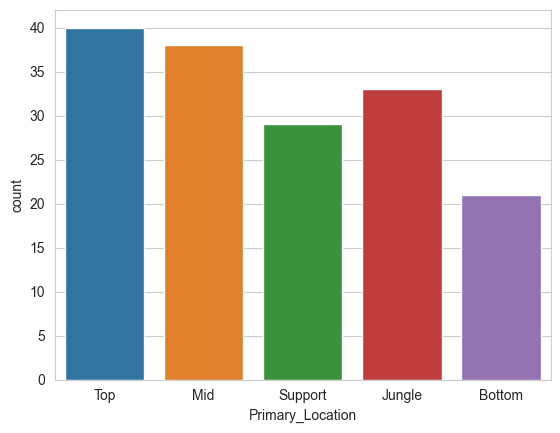

In [6]:
sb.countplot(df, x='Primary_Location')

On peut déterminer qu'il y a presque le double de champion qui y ont le poste Top que Bottom. On pourrait déjà se poser plusieurs questions, mais avant de chercher les stats, on va voir si les différents rôles des personnages sont bien répartis aussi.

## Analyse des rôles

<AxesSubplot: xlabel='Primary_Role', ylabel='count'>

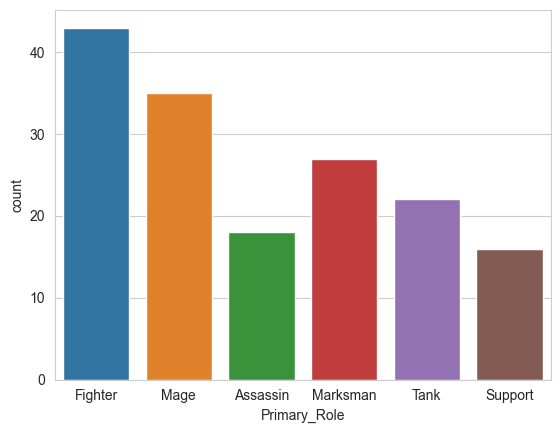

In [7]:
sb.countplot(df, x='Primary_Role')

Bien qu'on se base sur le rôle principal de chaque champion, ils ne sont pas vraiment équilibrés ! Il y a plus du double de combattants que d'assassins ou de supports. On voit aussi qu'il y a en majorité de Mage et de Combattant par rapport au reste ! En se basant sur ce graphique et celui plus haut. On peut se demander si le rôle principal d'un champion aura un impact sur le poste ou il sera joué principalement. Regardons ça

## Analyse des Rôles par Postes

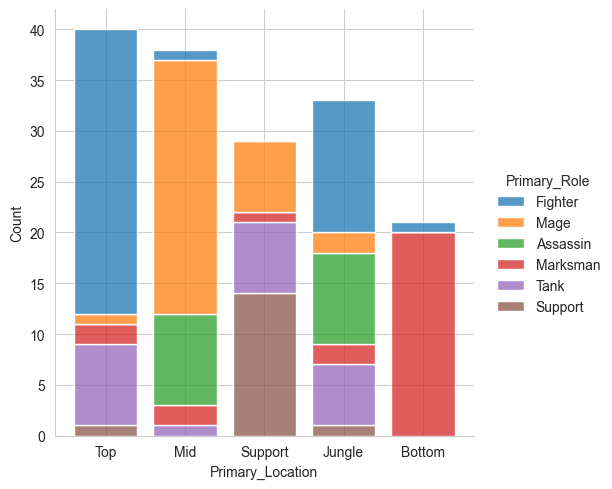

In [8]:
sb.displot(df, x='Primary_Location', multiple='stack', hue='Primary_Role', shrink=0.8)

Ce graphique est très intéressant. Il répond à notre problématique du dessus : On distingue clairement un type de Rôle pour 3 des 5 Postes. Pour autant, des Combattants se retrouvent en Bottom, des Mages en Support et même des Supports en Top et en Jungle les rôles sont très diversifiés. On ne peut donc pas affirmer qu'un Rôle determine un Poste. Il nous faut donc analysés les statistiques des différents Rôles pour répondre à notre problèmatique : Les satitistiques de base d'un champion déterminent-elles son rôle dans le jeu ?

## Analyse des statistiques

### 1) La vie

<AxesSubplot: xlabel='Primary_Role', ylabel='Health'>

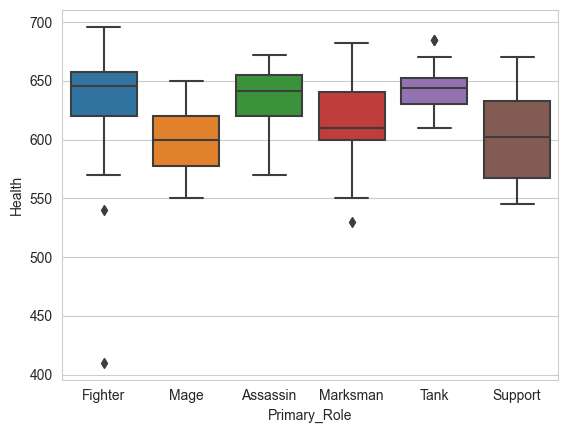

In [9]:
sb.boxplot(df, x='Primary_Role', y='Health')

On peut voir que la répartition des points de vie (Health) par rapport au Rôle est assez inégale. Les Tanks et les Fighters ont généralement plus de vie que le reste et les Mages moins.
Cependant, on peut voir que certains mages ont autant de vie que certains Tanks (qui sont censés être les plus les plus hauts). Il y a donc une tendance pour les Tank et les Fighter d'avir plus de vie mais
ce graphique ne nous permet pas d'affirmer que cette statistique soit déterminante dans le rôle d'un champion.

### 2) Armure

<AxesSubplot: xlabel='Primary_Role', ylabel='Armor'>

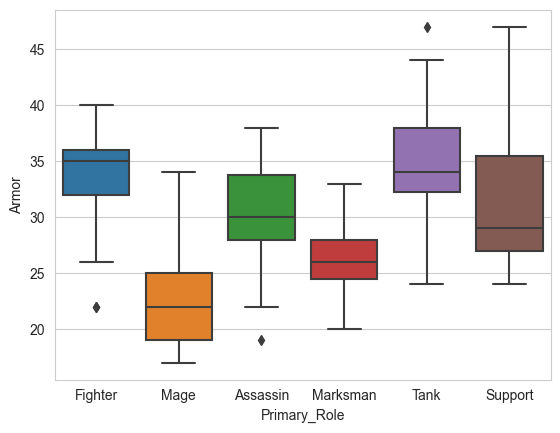

In [10]:
sb.boxplot(df, x='Primary_Role', y='Armor')

Cette fois si, on remarque que les Mages et les Marksmans ont en majorité moins d'armure que les autres. On remarque aussi que les Fighters, Tanks et Support ont tendance à être plus haut que les autres en armure.
On peux donc conclure qu'un Mage aura forcément moins d'armure que les autres

### 3) La Portée

<AxesSubplot: xlabel='Primary_Role', ylabel='Range'>

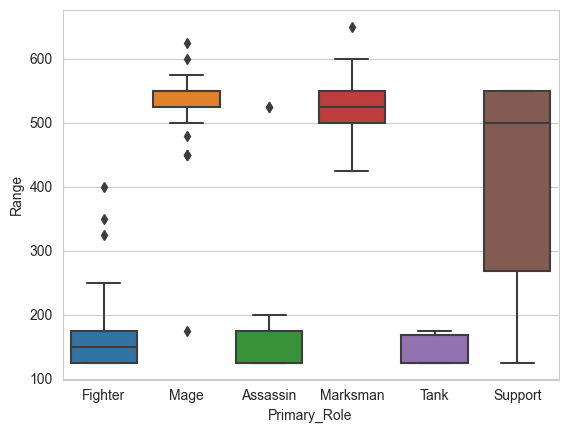

In [11]:
sb.boxplot(df, x='Primary_Role', y='Range')


Ici le graphique est très explicite. On remarque encore une fois que les Mages et les Marksmans sortent du lot.
#### On peut donc répondre à notre problématique pour ces deux rôles. Oui, si un champion à plus de portée et moins d'amure que les autres. Il sera certainement un mage ou un tireur
On note aussi que les Supports ont aussi plus de portée que les autres rôles.
Il reste maintenant à déterminer si d'autres statistiques influent sur d'autres postes.

### 4) Le Mana

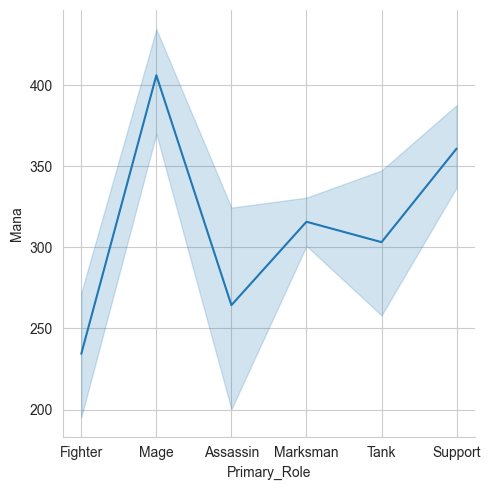

In [12]:
sb.relplot(df, x='Primary_Role', y='Mana', kind='line')

Avec ce graphique, on peut voir que les Assassins et les Fighters ont généralement moins de Mana que les autres. La ou les Mages en ont plus que les autres.
#### On peut donc determiner qu'un champion qui a moins de Mana à de grande chance d'être un Fighter ou un Assassin et dans le cas contraire, il sera certainement un Mage

### 5) L'Attaque

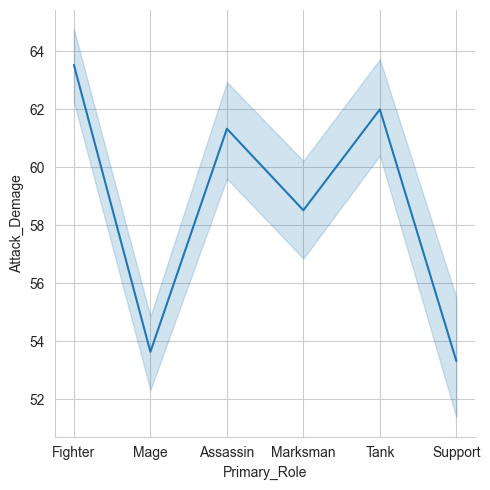

In [13]:
sb.relplot(df, x='Primary_Role', y='Attack_Demage', kind='line')

Avec ce graphique. On peut voir que les Mages et les Supports ont moins de dégats (Attack_Demage) que les autres. En se basant sur les autres graphiques et celui-ci, on peut donc en conclure une chose :
#### Si un champion à assez de Mana, assez peu de portée et peu de dégât, alors il sera Support

### 6) Dégâts par Niveau

<AxesSubplot: xlabel='Primary_Role', ylabel='Health_Regen'>

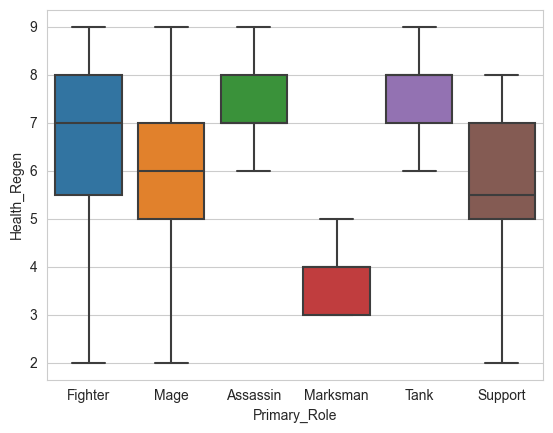

In [14]:
sb.boxplot(df, x='Primary_Role', y='Health_Regen', showfliers = False)

Sur ce graphique, on peut determiner que les Marksmans ont beaucoup moins régénération de vie que les autres au niveau 1. Ce qui nous permet de les différencier encore plus des autres.

## Conclusion
Avec ces différents graphiques, j'ai pu determiner plusieurs choses compte tenu du dataset à ma disposition :
- Si un champion a assez de Mana, assez peu de porté et peu de dégâts, il a des chances d'être Support
- Si un champion a beaucoup de Mana et peu d'armure, il sera certainement un Mage
- Si un champion a peu d'armure et une grande portée, il sera certainement un Tireur
- Pour ce qui est des Assassins, des Combattants ou des Tanks. Pour moi les différences ne sont pas assez notables pour les différencier avec leurs statistiques au niveau 1

Donc pour répondre à ma problématique. Oui, il est possible de déterminé le rôle d'un champion sur ses statistiques au niveau 1. Et avec des données en plus je pourrais donc affiner les résultats que j'ai déjà pu avoir avec ce jeu de données